<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Malaria%20Parasite%20Detection%20Using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Malaria Parasite Detection Using CNN.ipynb**

Dataset - https://lhncbc.nlm.nih.gov/publication/pub9932



In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import activations

In [2]:
print(tf.__version__)

2.8.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
Updating files:   2% (709/27562)
Updating files:   3% (827/27562)
Updating files:   4% (1103/27562)
Updating files:   4% (1363/27562)
Updating files:   5% (1379/27562)
Updating files:   6% (1654/27562)
Updating files:   7% (1930/27562)
Updating files:   7% (2081/27562)
Updating files:   8% (2205/27562)
Updating files:   9% (2481/27562)
Updating files:   9% (2755/27562)
Updating files:  10% (2757/27562)
Updating files:  11% (3032/27562)
Updating files:  12% (3308/27562)
Updating files:  12% (3413/27562)
Updating files:  13% (3584/27562)
Updating files:  14% (3859/27562)
Updating files:  14% (4057/27562)
Updating files:  15% (4135/27562)
Updating files:  16% (4410/27562)
Updating files:  16% (4630/27562)
Updating files:  17% (4686/27562)
Updating files:  18% (4962/27562)
Updating files:  18% (5225/27562)
Updating files:  19% (5237/27562)
Updating files:  20% (5513/27562)
Updating files:  21% (5789/27562)
Updating files:  21% (5850/27562)

In [5]:
img_width = 64
img_height = 64

In [6]:
# Rescaling the image between 0 to 1 and spliting the data in test and train.
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [8]:
train_data_generator = datagen.flow_from_directory(directory="Malaria-Classification-Using-CNN/malaria-dataset", 
                                                   target_size=(img_width, img_height),
                                                   class_mode = "binary",
                                                   batch_size = 16,
                                                   subset="training")

Found 22048 images belonging to 2 classes.


In [10]:
validation_data_generator = datagen.flow_from_directory(directory="Malaria-Classification-Using-CNN/malaria-dataset", 
                                                   target_size=(img_width, img_height),
                                                   class_mode = "binary",
                                                   batch_size = 16,
                                                   subset="validation")

Found 5510 images belonging to 2 classes.


In [11]:
train_data_generator.labels, validation_data_generator.labels

(array([0, 0, 0, ..., 1, 1, 1]), array([0, 0, 0, ..., 1, 1, 1]))

**Build CNN Model**

In [14]:
inputs = keras.Input(shape=(img_width, img_height, 3))

x = keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation=activations.relu)(inputs)
x = keras.layers.MaxPool2D(3, 3)(x)
x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activations.relu)(x)
x = keras.layers.MaxPool2D(2, 2)(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation=activations.relu)(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(1, activation=activations.sigmoid)(x)

model = keras.Model(inputs=inputs, outputs=[outputs], name="cnn")

model.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 20, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                           

In [15]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()
metrics=["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=["accuracy"])

In [16]:
history = model.fit(train_data_generator,
                    steps_per_epoch = len(train_data_generator),
                    epochs = 5,
                    validation_data = validation_data_generator,
                    validation_steps = len(validation_data_generator)
                    )

Epoch 1/5
1378/1378 [==============================] - 296s 214ms/step - loss: 0.4333 - accuracy: 0.7978 - val_loss: 0.1802 - val_accuracy: 0.9292
Epoch 2/5
1378/1378 [==============================] - 53s 39ms/step - loss: 0.1983 - accuracy: 0.9319 - val_loss: 0.1671 - val_accuracy: 0.9392
Epoch 3/5
1378/1378 [==============================] - 58s 42ms/step - loss: 0.1880 - accuracy: 0.9415 - val_loss: 0.1778 - val_accuracy: 0.9323
Epoch 4/5
1378/1378 [==============================] - 58s 42ms/step - loss: 0.1661 - accuracy: 0.9502 - val_loss: 0.1621 - val_accuracy: 0.9399
Epoch 5/5
1378/1378 [==============================] - 61s 45ms/step - loss: 0.1563 - accuracy: 0.9525 - val_loss: 0.1599 - val_accuracy: 0.9403


In [17]:
history.history

{'loss': [0.43331408500671387,
  0.1983204483985901,
  0.18795958161354065,
  0.16611096262931824,
  0.15626996755599976],
 'accuracy': [0.7977594137191772,
  0.9318758845329285,
  0.9415366649627686,
  0.950199544429779,
  0.9525126814842224],
 'val_loss': [0.1802462339401245,
  0.16711652278900146,
  0.17775215208530426,
  0.16209904849529266,
  0.15989884734153748],
 'val_accuracy': [0.9292196035385132,
  0.9392014741897583,
  0.9323049187660217,
  0.9399273991584778,
  0.9402903914451599]}

In [18]:
epoch_range = range(1, 6)

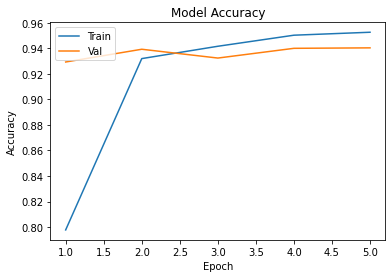

In [19]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

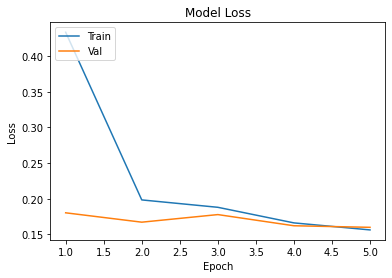

In [20]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()